# Predict the level of Problematic Internet Use Among Children and Adolescents

### Import Libraries and Dataset

In [ ]:
filePathTrain = r'D:\7th Semester\Data Mining\Mini-project\Dataset\train.csv'
filePathTest = r'D:\7th Semester\Data Mining\Mini-project\Dataset\test.csv'
filePathDict = r'D:\7th Semester\Data Mining\Mini-project\Dataset\data_dictionary.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [ ]:
df_train = pd.read_csv(filePathTrain)
df_test = pd.read_csv(filePathTest)
df_dict = pd.read_csv(filePathDict)

## Dataset Description

***Dataset Size***

In [ ]:
print(f"The shape of the training DataFrame (df_train): {df_train.shape}")
print(f"The shape of the test DataFrame (df_test): {df_test.shape}")
print(f"The shape of the data dictionary DataFrame (df_dict): {df_dict.shape}")

The shape of the training DataFrame (df_train): (3960, 82)
The shape of the test DataFrame (df_test): (20, 59)
The shape of the data dictionary DataFrame (df_dict): (81, 6)


***Feature Descriptions***

In [ ]:
df_train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

> The dataset contains a total of 80 features, along with 2 target variables. One of the columns, `SII`, is derived from the `PCIAT_Total` feature. The dataset includes 3,960 samples in total.


---

**Measurements from a variety of instruments**

- **Demographics**: Information about the age and sex of participants.
  
- **Internet Use**: The number of hours participants spend using a computer or the internet per day.

- **Children's Global Assessment Scale**: A numeric scale used by mental health clinicians to assess the general functioning of youths under the age of 18.

- **Physical Measures**: Data on participants' blood pressure, heart rate, height, weight, and waist and hip measurements.

- **FitnessGram Vitals and Treadmill**: Measurements of cardiovascular fitness assessed using the NHANES treadmill protocol.

- **FitnessGram Child**: A health-related physical fitness assessment measuring five parameters: aerobic capacity, muscular strength, muscular endurance, flexibility, and body composition.

- **Bio-electric Impedance Analysis**: A measure of key body composition elements, including BMI, fat percentage, muscle mass, and water content.

- **Physical Activity Questionnaire**: Information about children's participation in vigorous physical activities over the past 7 days.

- **Sleep Disturbance Scale**: A scale used to categorize sleep disorders in children.

- **Actigraphy**: An objective measure of ecological physical activity collected using a research-grade biotracker.

- **Parent-Child Internet Addiction Test (PCIAT)**: A 20-item scale measuring characteristics and behaviors associated with compulsive internet use, including compulsivity, escapism, and dependency.

- **PCIAT_Total**: This field summarizes the results of the PCIAT test. The target variable, **SII**, is derived from this field, with categories as follows:
  - 0: None
  - 1: Mild
  - 2: Moderate
  - 3: Severe

- **Participant Identifier**: Each participant is assigned a unique identifier (`id`).

In [ ]:
unique_instruments = df_dict['Instrument'].unique()

for instrument in unique_instruments:
    print(f"Samples for Instrument: {instrument}")
    display(df_dict[df_dict['Instrument'] == instrument])
    print("\n" + "-"*50 + "\n")

Samples for Instrument: Identifier


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN



--------------------------------------------------

Samples for Instrument: Demographics


,Instrument,Field,Description,Type,Values,Value Labels
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"



--------------------------------------------------

Samples for Instrument: Children's Global Assessment Scale


,Instrument,Field,Description,Type,Values,Value Labels
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN



--------------------------------------------------

Samples for Instrument: Physical Measures


,Instrument,Field,Description,Type,Values,Value Labels
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN
10,Physical Measures,Physical-Waist_Circumference,Waist circumference (in),int,NaN,NaN
11,Physical Measures,Physical-Diastolic_BP,Diastolic BP (mmHg),int,NaN,NaN
12,Physical Measures,Physical-HeartRate,Heart rate (beats/min),int,NaN,NaN
13,Physical Measures,Physical-Systolic_BP,Systolic BP (mmHg),int,NaN,NaN



--------------------------------------------------

Samples for Instrument: FitnessGram Vitals and Treadmill


,Instrument,Field,Description,Type,Values,Value Labels
14,FitnessGram Vitals and Treadmill,Fitness_Endurance-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
15,FitnessGram Vitals and Treadmill,Fitness_Endurance-Max_Stage,Maximum stage reached,int,NaN,NaN
16,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Mins,Exact time completed: Minutes,int,NaN,NaN
17,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Sec,Exact time completed: Seconds,int,NaN,NaN



--------------------------------------------------

Samples for Instrument: FitnessGram Child


,Instrument,Field,Description,Type,Values,Value Labels
18,FitnessGram Child,FGC-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
19,FitnessGram Child,FGC-FGC_CU,Curl up total,int,NaN,NaN
20,FitnessGram Child,FGC-FGC_CU_Zone,Curl up fitness zone,categorical int,"0,1","0=Needs Improvement, 1=Healthy Fitness Zone"
21,FitnessGram Child,FGC-FGC_GSND,Grip Strength total (non-dominant),float,NaN,NaN
22,FitnessGram Child,FGC-FGC_GSND_Zone,Grip Strength fitness zone (non-dominant),categorical int,"1,2,3","1=Weak, 2=Normal, 3=Strong"
23,FitnessGram Child,FGC-FGC_GSD,Grip Strength total (dominant),float,NaN,NaN
24,FitnessGram Child,FGC-FGC_GSD_Zone,Grip Strength fitness zone (dominant),categorical int,"1,2,3","1=Weak, 2=Normal, 3=Strong"
25,FitnessGram Child,FGC-FGC_PU,Push-up total,int,NaN,NaN
26,FitnessGram Child,FGC-FGC_PU_Zone,Push-up fitness zone,categorical int,"0,1","0=Needs Improvement, 1=Healthy Fitness Zone"
27,FitnessGram Child,FGC-FGC_SRL,Sit & Reach total (left side),float,NaN,NaN



--------------------------------------------------

Samples for Instrument: Bio-electric Impedance Analysis


,Instrument,Field,Description,Type,Values,Value Labels
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
34,Bio-electric Impedance Analysis,BIA-BIA_Activity_Level_num,Activity Level,categorical int,"1,2,3,4,5","1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=..."
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content,float,NaN,NaN
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index,float,NaN,NaN
37,Bio-electric Impedance Analysis,BIA-BIA_BMR,Basal Metabolic Rate,float,NaN,NaN
38,Bio-electric Impedance Analysis,BIA-BIA_DEE,Daily Energy Expenditure,float,NaN,NaN
39,Bio-electric Impedance Analysis,BIA-BIA_ECW,Extracellular Water,float,NaN,NaN
40,Bio-electric Impedance Analysis,BIA-BIA_FFM,Fat Free Mass,float,NaN,NaN
41,Bio-electric Impedance Analysis,BIA-BIA_FFMI,Fat Free Mass Index,float,NaN,NaN
42,Bio-electric Impedance Analysis,BIA-BIA_FMI,Fat Mass Index,float,NaN,NaN



--------------------------------------------------

Samples for Instrument: Physical Activity Questionnaire (Adolescents)


,Instrument,Field,Description,Type,Values,Value Labels
50,Physical Activity Questionnaire (Adolescents),PAQ_A-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
51,Physical Activity Questionnaire (Adolescents),PAQ_A-PAQ_A_Total,Activity Summary Score (Adolescents),float,NaN,NaN



--------------------------------------------------

Samples for Instrument: Physical Activity Questionnaire (Children)


,Instrument,Field,Description,Type,Values,Value Labels
52,Physical Activity Questionnaire (Children),PAQ_C-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
53,Physical Activity Questionnaire (Children),PAQ_C-PAQ_C_Total,Activity Summary Score (Children),float,NaN,NaN



--------------------------------------------------

Samples for Instrument: Parent-Child Internet Addiction Test


,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."



--------------------------------------------------

Samples for Instrument: Sleep Disturbance Scale


,Instrument,Field,Description,Type,Values,Value Labels
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN



--------------------------------------------------

Samples for Instrument: Internet Use


,Instrument,Field,Description,Type,Values,Value Labels
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
80,Internet Use,PreInt_EduHx-computerinternet_hoursday,Hours of using computer/internet,categorical int,"0,1,2,3","0=Less than 1h/day, 1=Around 1h/day, 2=Around ..."



--------------------------------------------------



## Exploratory Data Analysis

### 1. PCIAT Features

The dataset contains 22 PCIAT features, which include responses to 20 questions (each rated on a scale of 1 to 5), the total score, and the 'season' in which the test was conducted. The `SII` target variable is derived from the total PCIAT score based on the following categories:

- **0-30**: SII = 0 (None)
- **31-49**: SII = 1 (Mild)
- **50-79**: SII = 2 (Moderate)
- **80-100**: SII = 3 (Severe)

For analysis, I have decided to drop all individual PCIAT features from the dataset, except for the `PCIAT Total` score, which will be used as a regression target. A box plot visualization of the PCIAT Total reveals that many of the highest scores appear to be outliers. Despite this, these high scores represent our most critical category and should be carefully considered in the analysis.

In [ ]:
PCIAT_cols = [val for val in df_train.columns[df_train.columns.str.contains('PCIAT')]]
print('Number of PCIAT features = ' , len(PCIAT_cols))

Number of PCIAT features =  22


In [ ]:
fig = px.scatter(df_train, x = 'PCIAT-PCIAT_Total', color = 'sii', marginal_x="box", title = 'PCIAT Total')
fig = fig.update_layout(yaxis_title="")
fig.update_yaxes(showticklabels=False)

## Data Preprocessing

In [ ]:
# Get the total number of rows
total_rows = len(df_train)

# Print the header
print(f"{'Column Name':<30} {'Missing Values':<15} {'Percentage (%)':<15}")
print("-" * 60)

for i in range(len(df_train.columns)):
    missing_count = df_train[df_train.columns[i]].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{df_train.columns[i]:<30} {missing_count:<15} {missing_percentage:<15.2f}")

Column Name                    Missing Values  Percentage (%) 
------------------------------------------------------------
id                             0               0.00           
Basic_Demos-Enroll_Season      0               0.00           
Basic_Demos-Age                0               0.00           
Basic_Demos-Sex                0               0.00           
CGAS-Season                    1405            35.48          
CGAS-CGAS_Score                1539            38.86          
Physical-Season                650             16.41          
Physical-BMI                   938             23.69          
Physical-Height                933             23.56          
Physical-Weight                884             22.32          
Physical-Waist_Circumference   3062            77.32          
Physical-Diastolic_BP          1006            25.40          
Physical-HeartRate             993             25.08          
Physical-Systolic_BP           1006            25.40     

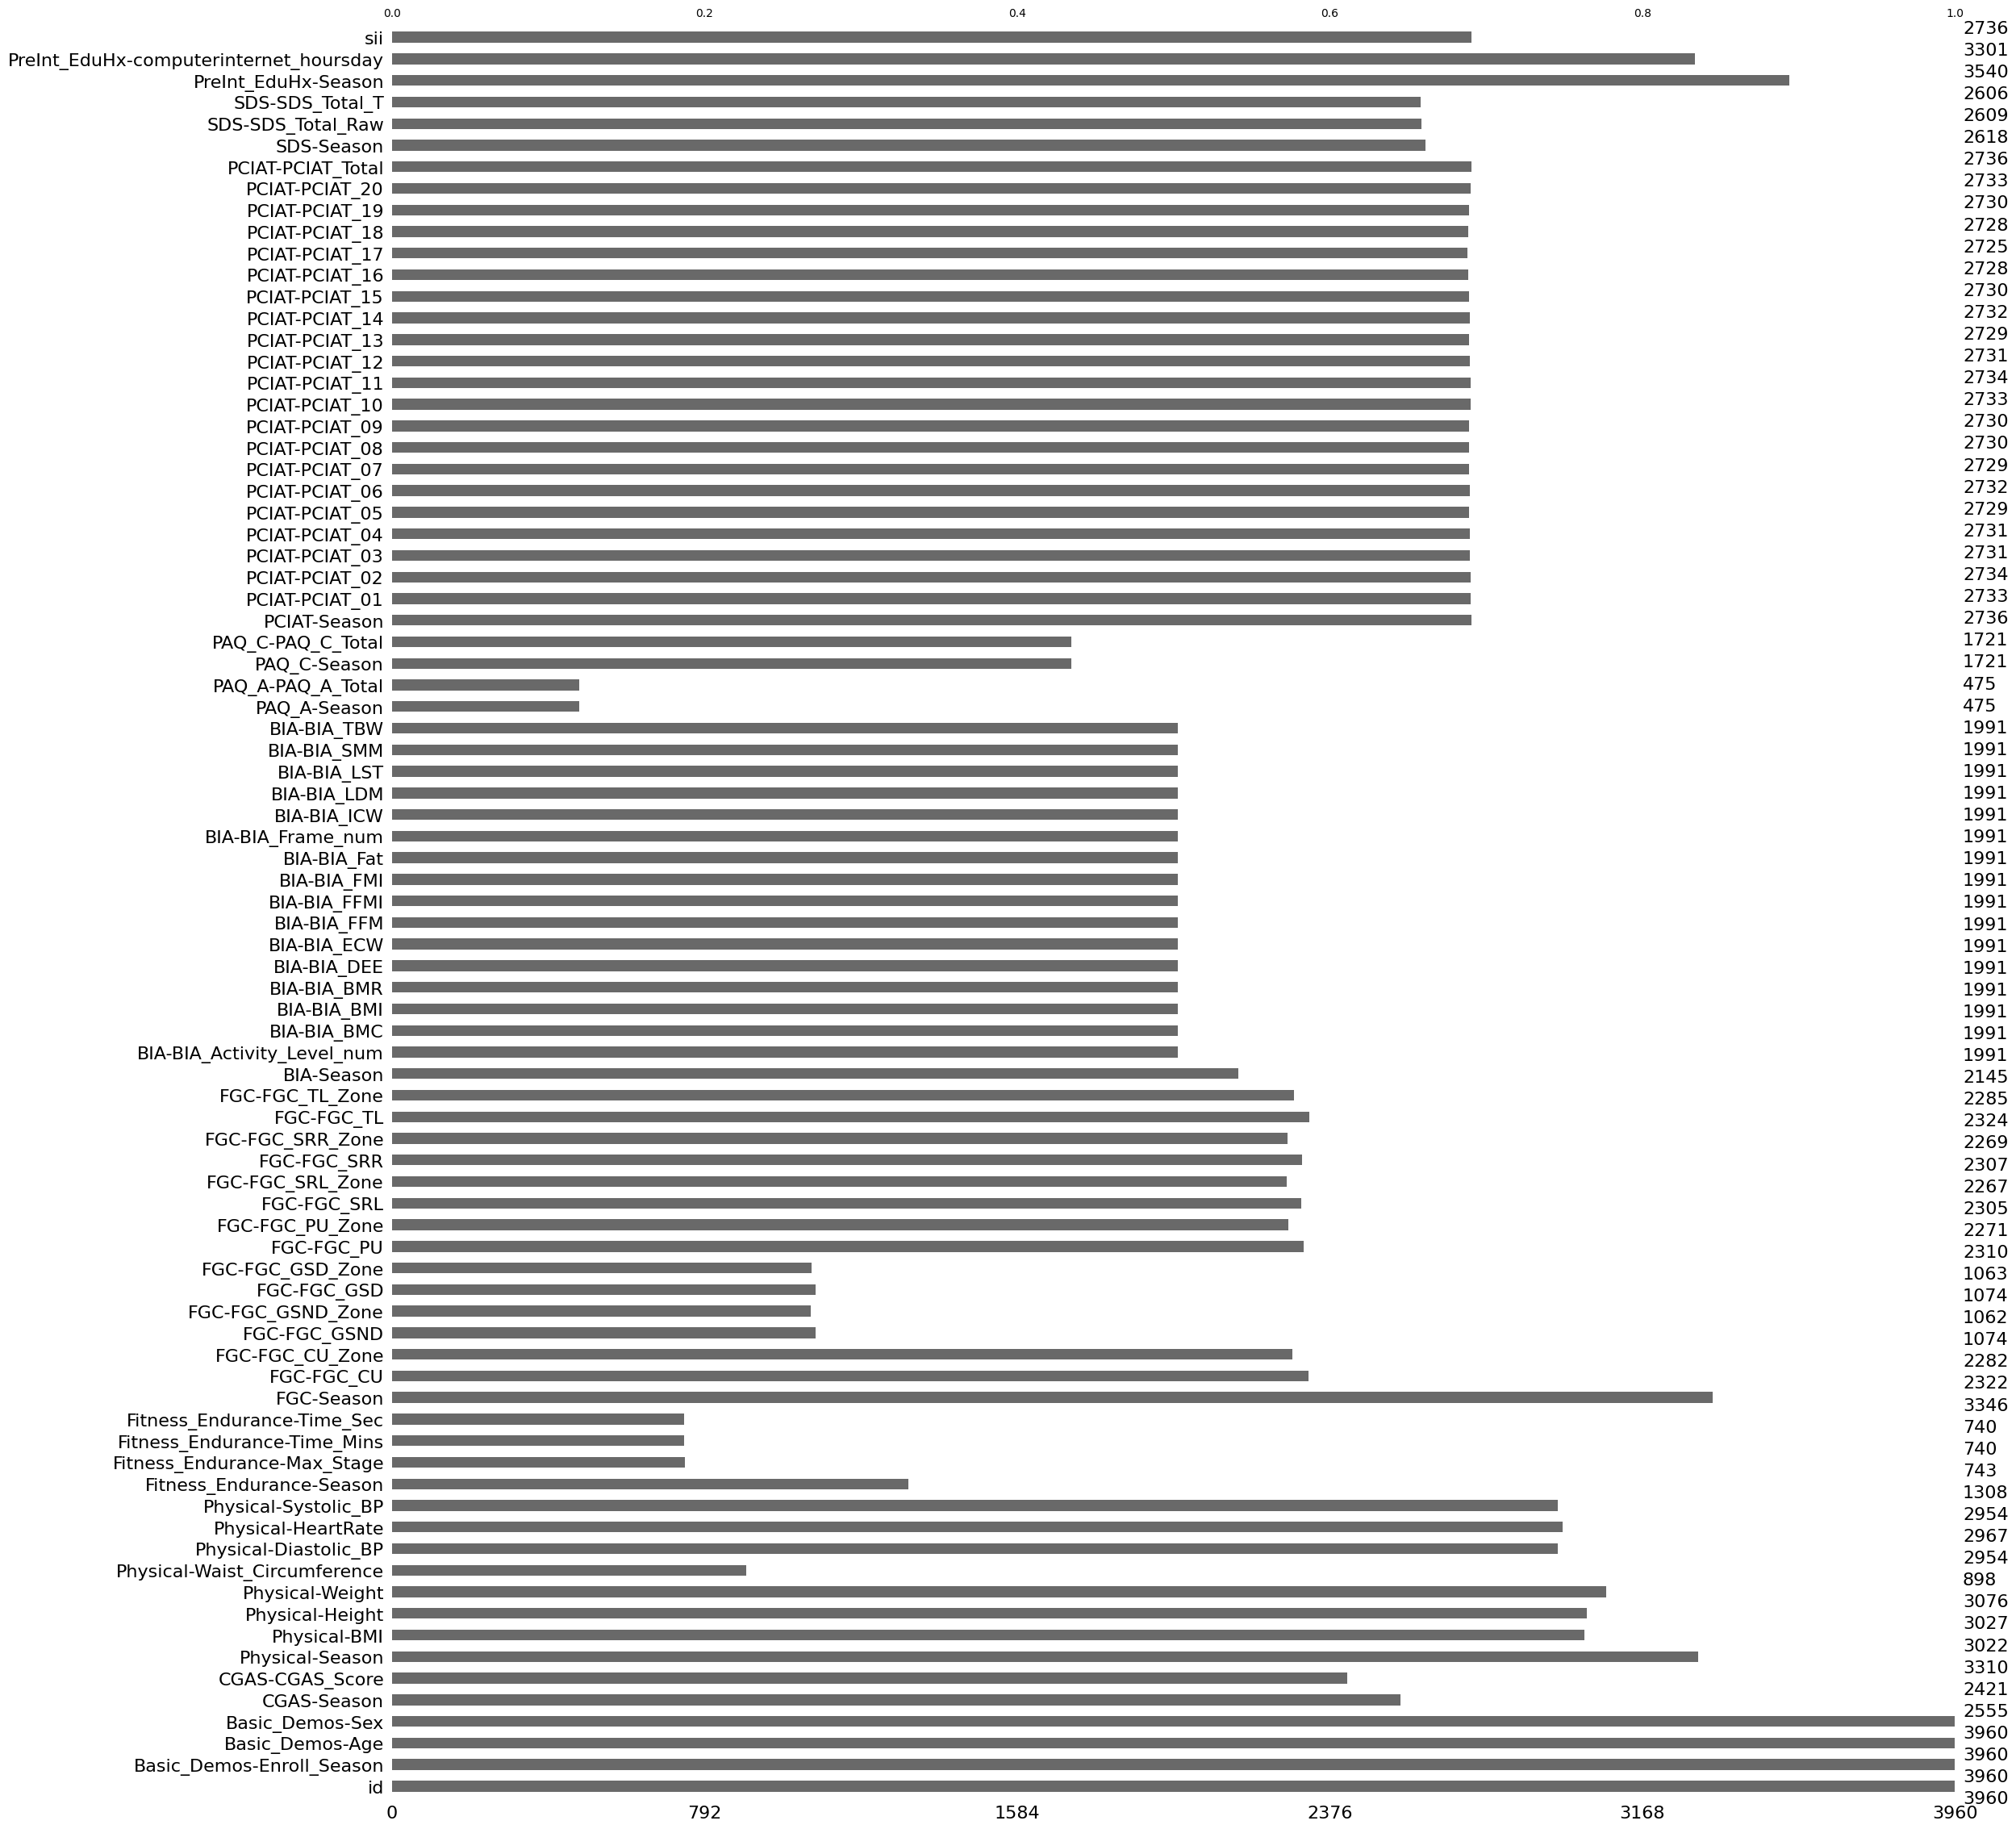

In [ ]:
# Visualize missing data as a bar plot
msno.bar(df_train)
plt.show()

In [ ]:
(df_train.isnull().sum() > 500).sum()

77

In [ ]:
(df_train.isnull().sum() > 1000).sum()

70

In [ ]:
(df_train.isnull().sum() > 2000).sum()

13

In [ ]:
print(f"{'Column Name':<30} {'Missing Values':<15}")
print("-" * 45)

for i in range(len(df_train.columns)):
    missing_count = df_train[df_train.columns[i]].isnull().sum()
    if missing_count > 1000:
        print(f"{df_train.columns[i]:<30} {missing_count:<15}")
        # df_train.drop(df_train.columns[i], axis=1, inplace=True)

Column Name                    Missing Values 
---------------------------------------------
CGAS-Season                    1405           
CGAS-CGAS_Score                1539           
Physical-Waist_Circumference   3062           
Physical-Diastolic_BP          1006           
Physical-Systolic_BP           1006           
Fitness_Endurance-Season       2652           
Fitness_Endurance-Max_Stage    3217           
Fitness_Endurance-Time_Mins    3220           
Fitness_Endurance-Time_Sec     3220           
FGC-FGC_CU                     1638           
FGC-FGC_CU_Zone                1678           
FGC-FGC_GSND                   2886           
FGC-FGC_GSND_Zone              2898           
FGC-FGC_GSD                    2886           
FGC-FGC_GSD_Zone               2897           
FGC-FGC_PU                     1650           
FGC-FGC_PU_Zone                1689           
FGC-FGC_SRL                    1655           
FGC-FGC_SRL_Zone               1693           
FGC-FGC_SRR   

In [ ]:
df_train.duplicated().sum()

0

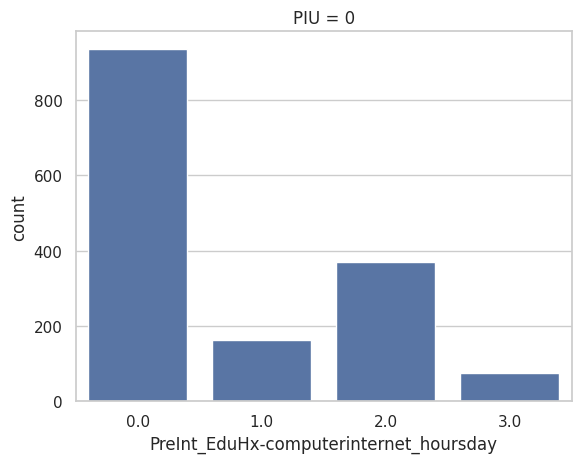

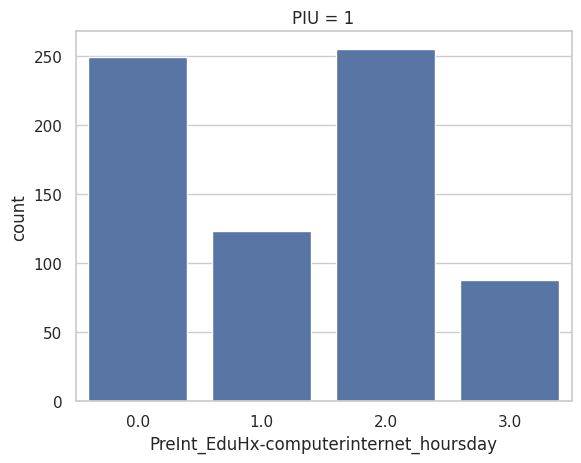

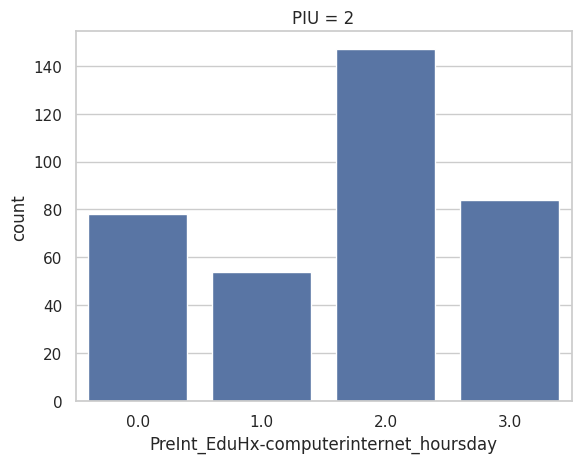

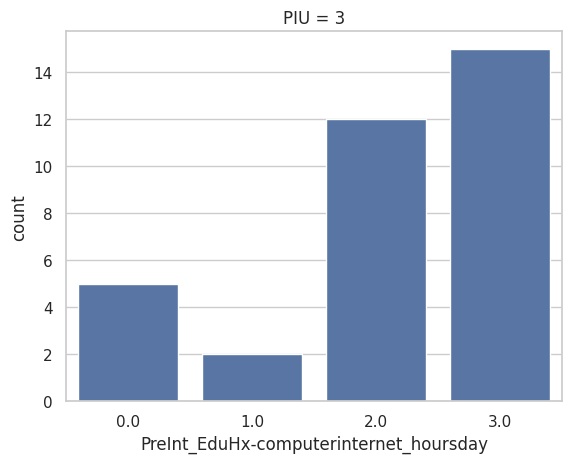

In [ ]:
vals = ['PIU = 0', 'PIU = 1','PIU = 2', 'PIU = 3']

for i in range(4):
    plt.figure()
    plot = sns.countplot(x = df_train[df_train.sii==i]['PreInt_EduHx-computerinternet_hoursday'])
    plot.set_title(vals[i])

In [ ]:
corr = pd.DataFrame(df_train.select_dtypes(include=['float64', 'int64']).corr()['PCIAT-PCIAT_Total'].sort_values(ascending = False))
corr

,PCIAT-PCIAT_Total
PCIAT-PCIAT_Total,1.000000
sii,0.899681
PCIAT-PCIAT_05,0.830993
PCIAT-PCIAT_15,0.823996
PCIAT-PCIAT_17,0.823708
PCIAT-PCIAT_03,0.823336
PCIAT-PCIAT_18,0.802030
PCIAT-PCIAT_02,0.788802
PCIAT-PCIAT_13,0.771990
PCIAT-PCIAT_08,0.770499


In [ ]:
selection = corr[(corr['PCIAT-PCIAT_Total']>.1) | (corr['PCIAT-PCIAT_Total']<-.1)]
selection = [val for val in selection.index]
selection.remove('PCIAT-PCIAT_Total')
selection.remove('sii')
selection.remove('Physical-BMI')
selection.remove('SDS-SDS_Total_Raw')

In [ ]:
selection

['PCIAT-PCIAT_05',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_07',
 'Physical-Height',
 'PCIAT-PCIAT_12',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'FGC-FGC_GSD',
 'Physical-Systolic_BP',
 'FGC-FGC_GSND',
 'FGC-FGC_TL',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

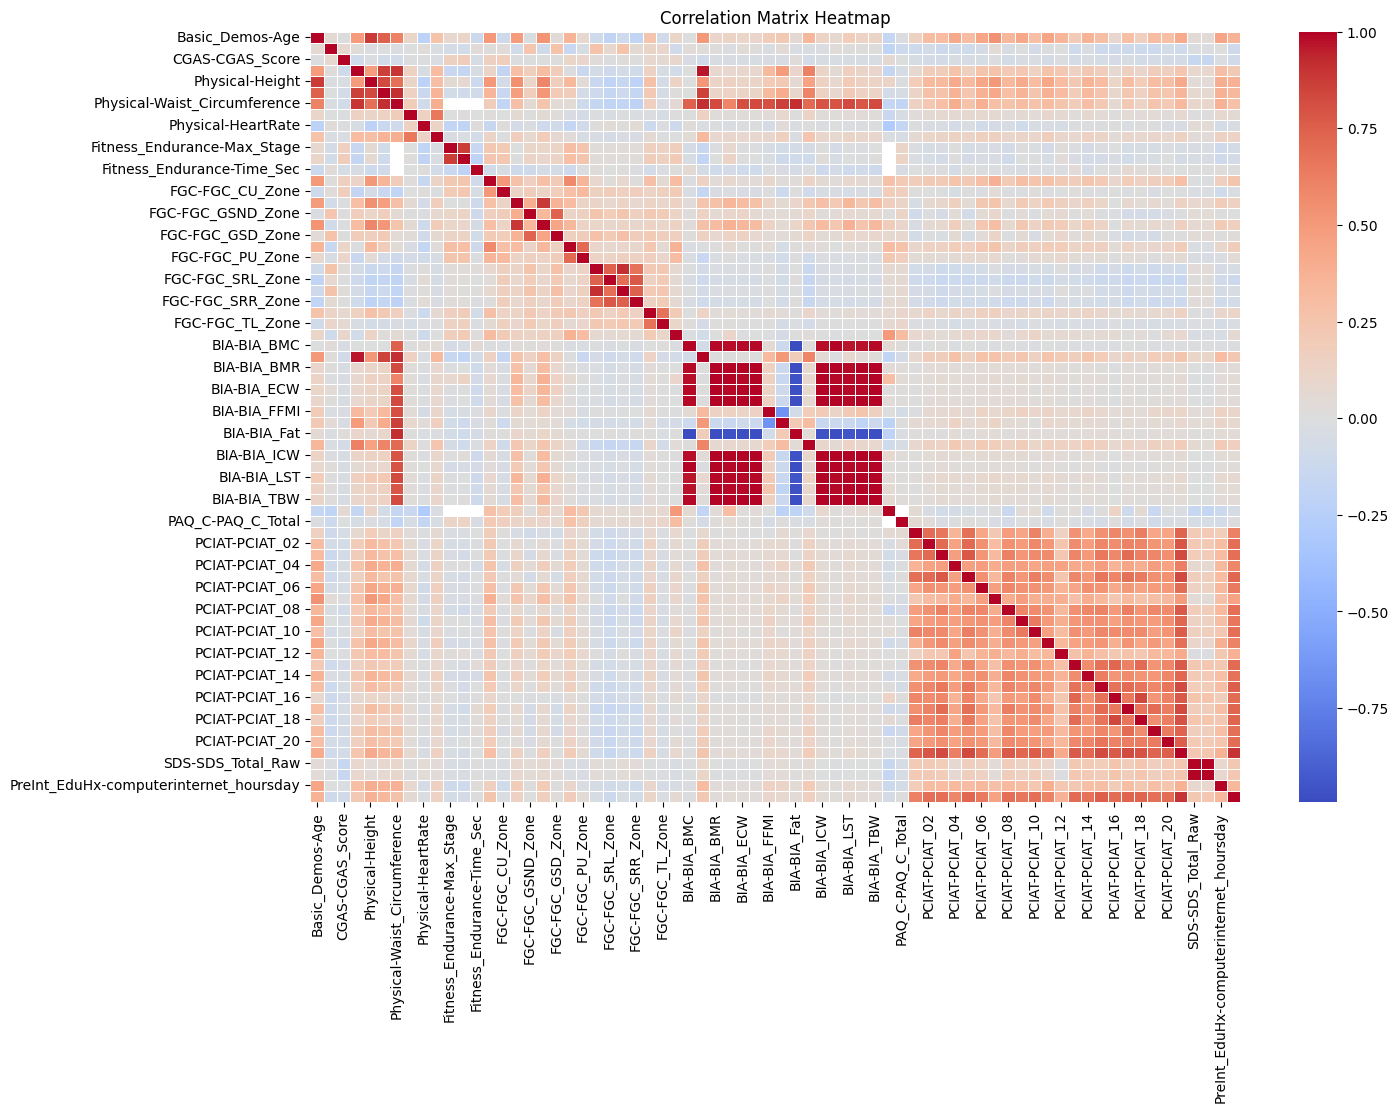

In [ ]:
# Select only numerical columns
numerical_df = df_train.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical data
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
corr_matrix

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
Basic_Demos-Age,1.000000,0.064004,-0.009994,0.492112,0.880274,0.748149,0.609601,0.107960,-0.218527,0.263875,...,0.085805,0.286888,0.159826,0.303259,0.286309,0.409559,0.037317,0.037115,0.441822,0.365990
Basic_Demos-Sex,0.064004,1.000000,0.075470,0.025793,-0.014454,0.003245,-0.020013,0.002076,0.026675,-0.025256,...,-0.097824,-0.102390,-0.110080,-0.104911,-0.067966,-0.093648,-0.020122,-0.018508,-0.000579,-0.100148
CGAS-CGAS_Score,-0.009994,0.075470,1.000000,-0.094074,-0.023185,-0.076399,-0.076116,-0.005292,-0.010108,-0.021392,...,-0.065687,-0.047770,-0.067922,-0.065210,-0.067920,-0.070542,-0.145369,-0.148457,-0.021596,-0.085261
Physical-BMI,0.492112,0.025793,-0.094074,1.000000,0.487097,0.865662,0.892149,0.141795,-0.036955,0.312045,...,0.071017,0.152122,0.100032,0.181208,0.161034,0.240858,0.087655,0.086185,0.296709,0.221125
Physical-Height,0.880274,-0.014454,-0.023185,0.487097,1.000000,0.833844,0.688033,0.115724,-0.217080,0.299157,...,0.112369,0.300590,0.184409,0.307084,0.292542,0.420765,0.036687,0.036478,0.399367,0.373530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,0.409559,-0.093648,-0.070542,0.240858,0.420765,0.353048,0.327013,0.069321,-0.037594,0.147081,...,0.769422,0.823708,0.802030,0.737243,0.754277,1.000000,0.234432,0.237718,0.374124,0.899681
SDS-SDS_Total_Raw,0.037317,-0.020122,-0.145369,0.087655,0.036687,0.075098,0.089831,0.006702,0.049194,0.036562,...,0.250015,0.177323,0.239387,0.171186,0.209167,0.234432,1.000000,0.996134,0.083501,0.229692
SDS-SDS_Total_T,0.037115,-0.018508,-0.148457,0.086185,0.036478,0.073482,0.091152,0.008502,0.047932,0.038317,...,0.252715,0.180220,0.241844,0.173366,0.209338,0.237718,0.996134,1.000000,0.086050,0.232982
PreInt_EduHx-computerinternet_hoursday,0.441822,-0.000579,-0.021596,0.296709,0.399367,0.375851,0.371418,0.074258,-0.073453,0.137728,...,0.180736,0.299658,0.223794,0.290488,0.245310,0.374124,0.083501,0.086050,1.000000,0.336526


In [ ]:
threshold = 0.8

# Find the pairs of highly correlated features
high_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if np.abs(corr_matrix.iloc[i, j]) > threshold:
            feature_pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(feature_pair)

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

In [ ]:
# Display the results
pd.set_option('display.max_rows', None)
high_corr_df

,Feature 1,Feature 2,Correlation
0,Basic_Demos-Age,Physical-Height,0.880274
1,Physical-BMI,Physical-Weight,0.865662
2,Physical-BMI,Physical-Waist_Circumference,0.892149
3,Physical-BMI,BIA-BIA_BMI,0.968849
4,Physical-Height,Physical-Weight,0.833844
5,Physical-Weight,Physical-Waist_Circumference,0.916710
6,Physical-Weight,BIA-BIA_BMI,0.858036
7,Physical-Waist_Circumference,BIA-BIA_BMI,0.920539
8,Physical-Waist_Circumference,BIA-BIA_BMR,0.830669
9,Physical-Waist_Circumference,BIA-BIA_ECW,0.818122


In [ ]:
df_train.shape

(3960, 82)

In [ ]:
half_missing = [val for val in df_train.columns[df_train.isnull().sum()>len(df_train)/2]]
half_missing

['Physical-Waist_Circumference',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'PAQ_A-Season',
 'PAQ_A-PAQ_A_Total',
 'PAQ_C-Season',
 'PAQ_C-PAQ_C_Total']

In [ ]:
selection = [i for i in selection if i not in half_missing]

In [ ]:
selection

['PCIAT-PCIAT_05',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_07',
 'Physical-Height',
 'PCIAT-PCIAT_12',
 'Basic_Demos-Age',
 'PreInt_EduHx-computerinternet_hoursday',
 'Physical-Weight',
 'FGC-FGC_CU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'FGC-FGC_PU',
 'BIA-BIA_Frame_num',
 'Physical-Systolic_BP',
 'FGC-FGC_TL',
 'BIA-BIA_FFMI',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_SRL_Zone']

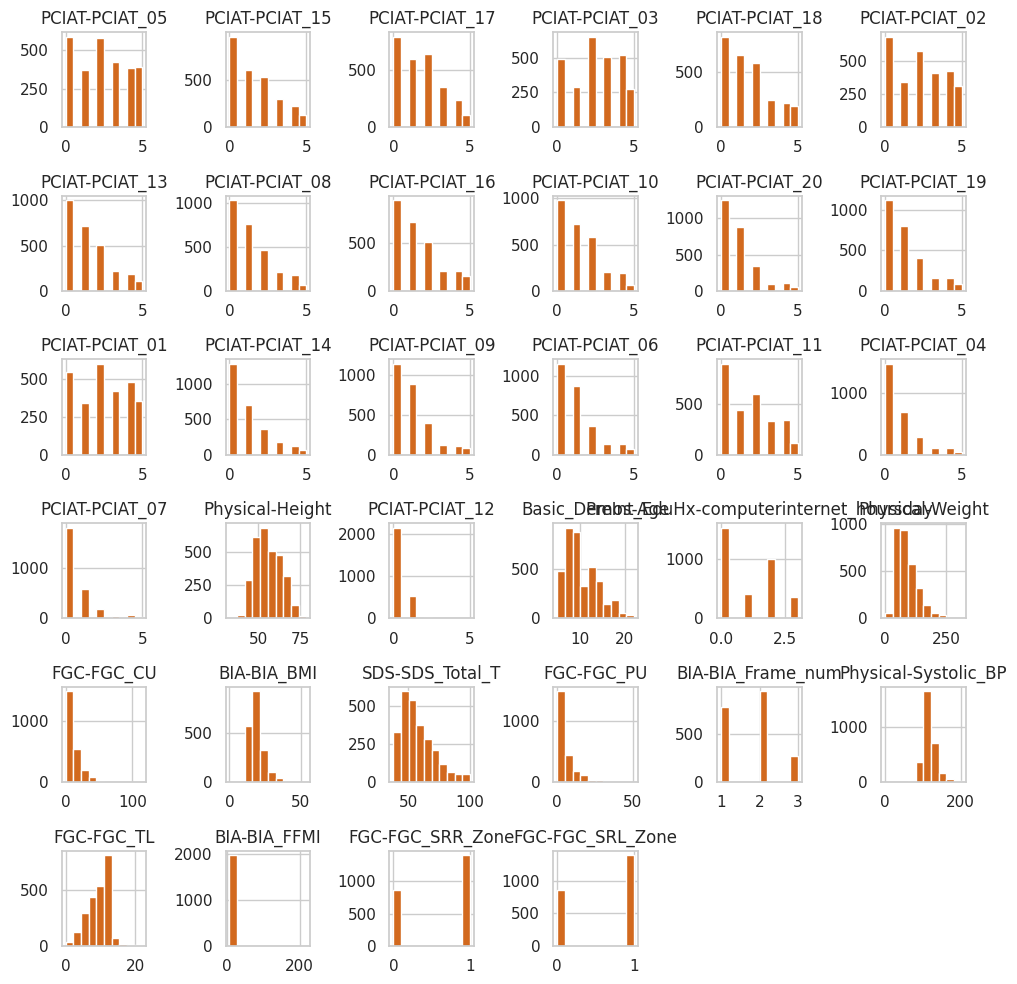

In [ ]:
df_train[selection].hist(figsize=(10,10), grid = True, color = 'chocolate')
plt.tight_layout()

In [ ]:
# List of features to remove
features_to_remove = [
    "Physical-Height", "Physical-Weight", "Physical-Waist_Circumference",
    "BIA-BIA_BMI", "Fitness_Endurance-Time_Mins", "FGC-FGC_GSND",
    "FGC-FGC_SRL", "BIA-BIA_BMR", "BIA-BIA_BMC", "BIA-BIA_DEE",
    "BIA-BIA_ECW", "BIA-BIA_FFM", "BIA-BIA_Fat", "BIA-BIA_ICW",
    "BIA-BIA_LDM", "BIA-BIA_LST", "BIA-BIA_SMM", "PCIAT-PCIAT_03",
    "PCIAT-PCIAT_05", "PCIAT-PCIAT_15", "PCIAT-PCIAT_16",
    "PCIAT-PCIAT_17", "SDS-SDS_Total_Raw"
]

# Remove the specified features from df_train
df_train.drop(columns=features_to_remove, inplace=True, errors='ignore')

# Display the remaining columns
print("Remaining features in df_train:")
print(df_train.columns)
print("Remaining Number of features:")
print(df_train.columns.shape)

Remaining features in df_train:
Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Frame_num', 'BIA-BIA_TBW', 'PAQ_A-Season',
       'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C_Total',
       'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09',
       'PCIAT-PCIAT_10',

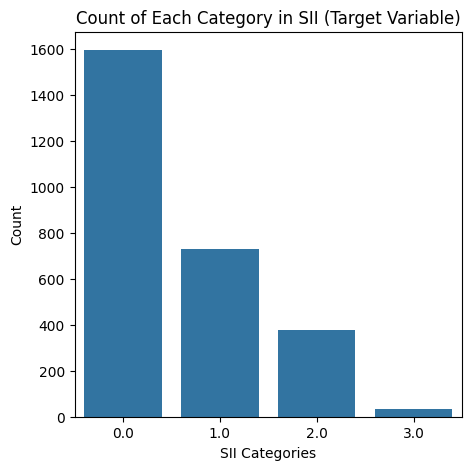

In [ ]:
# Plotting a bar plot for the categorical target variable
plt.figure(figsize=(5, 5))
sns.countplot(x='sii', data=df_train)
plt.title('Count of Each Category in SII (Target Variable)')
plt.xlabel('SII Categories')
plt.ylabel('Count')
plt.show()

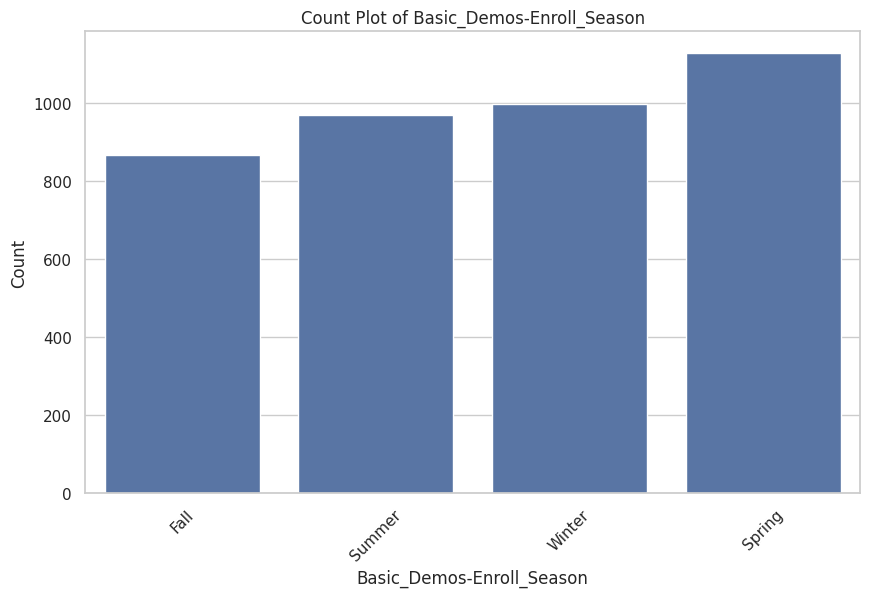

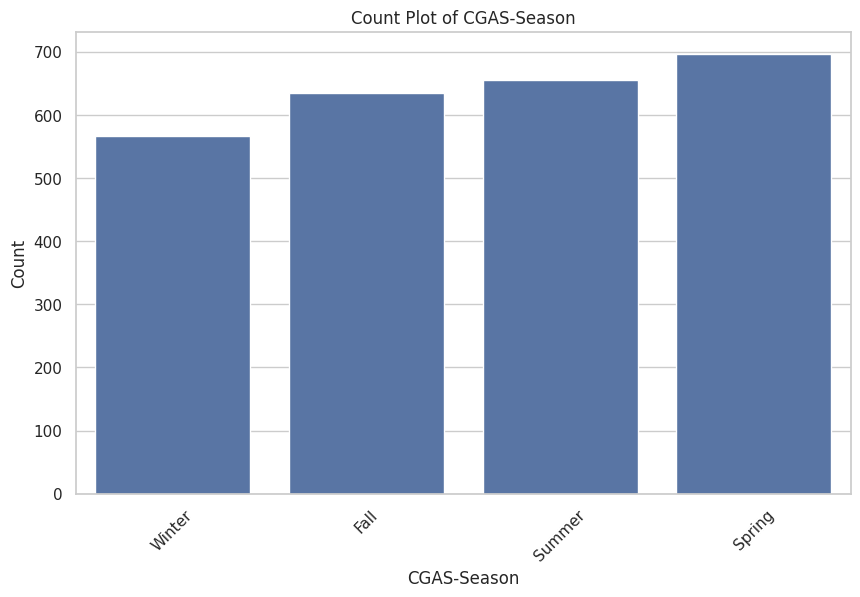

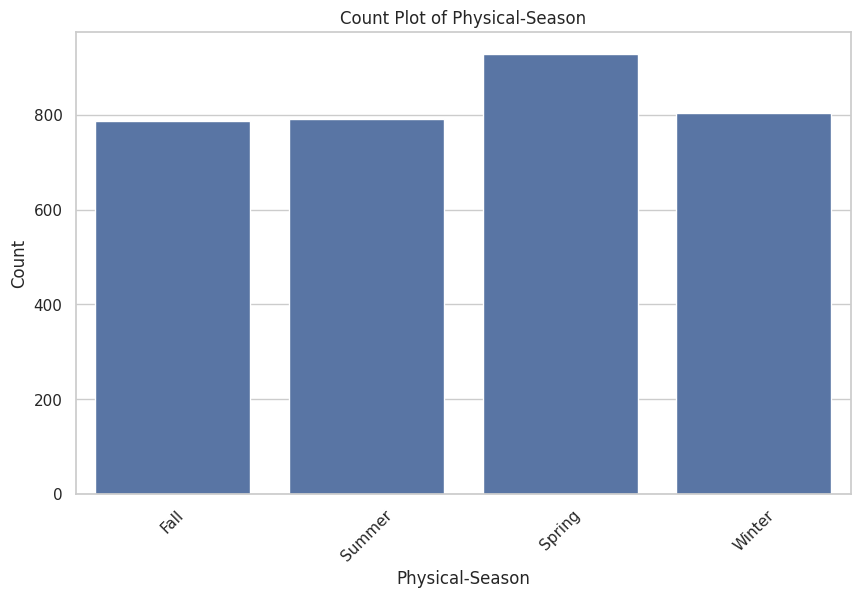

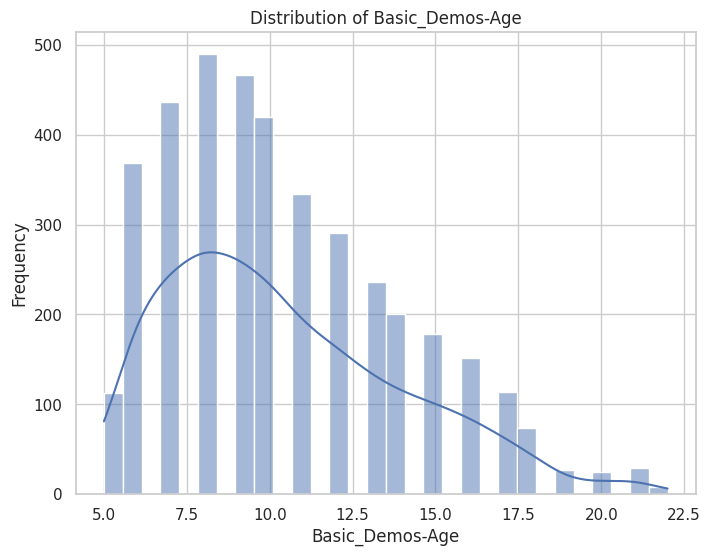

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


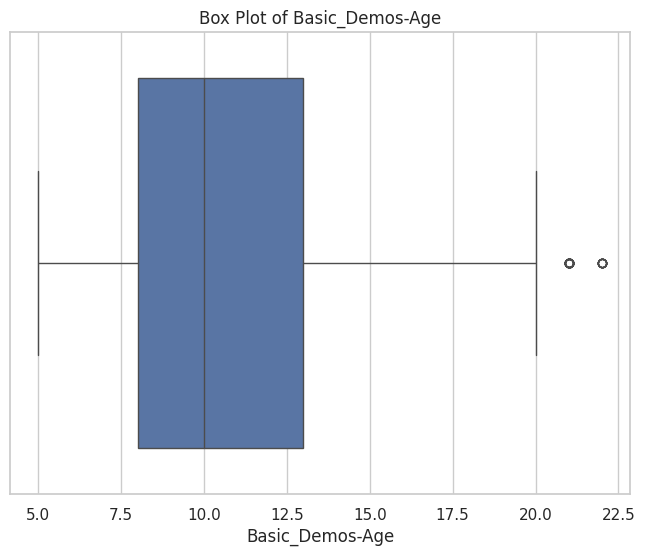

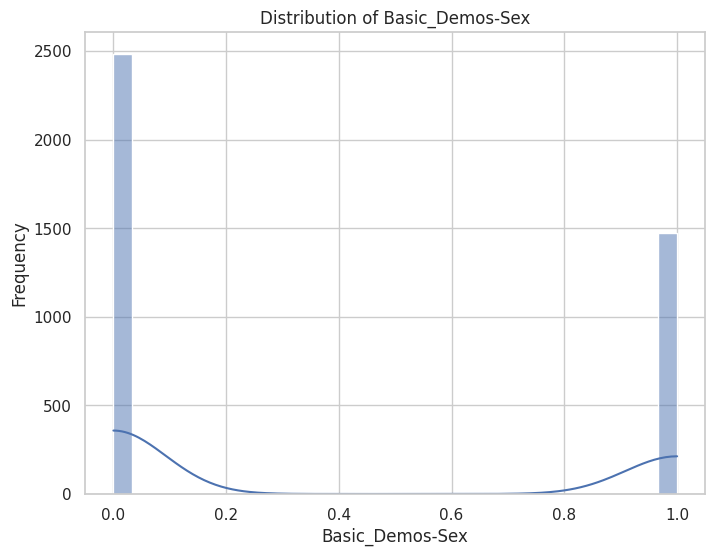

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


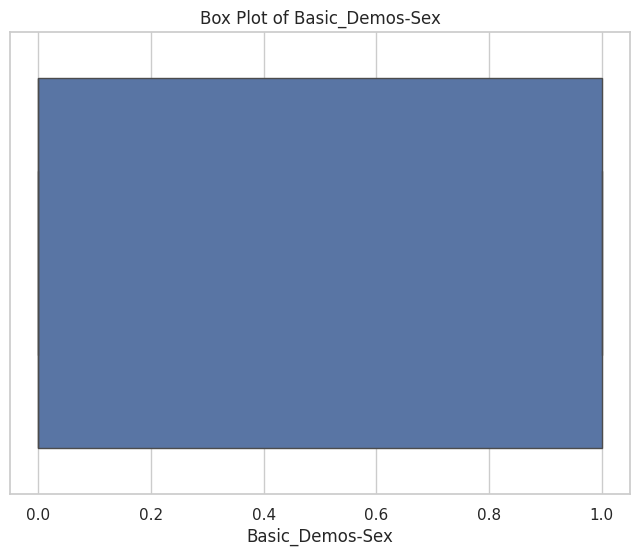

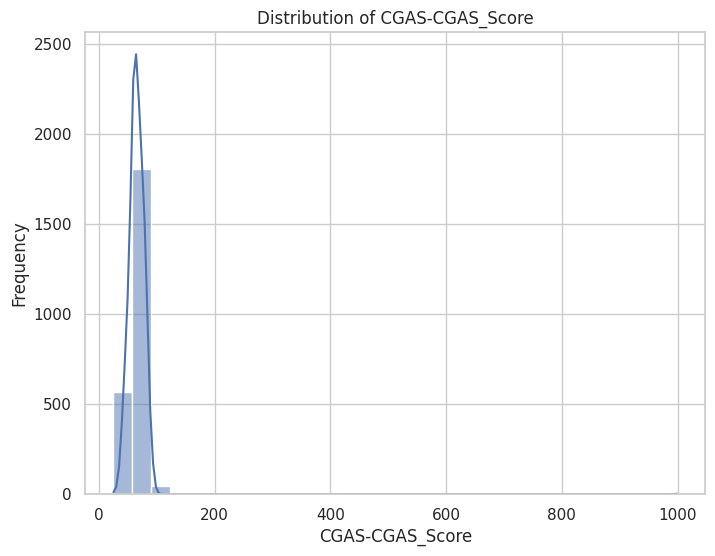

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


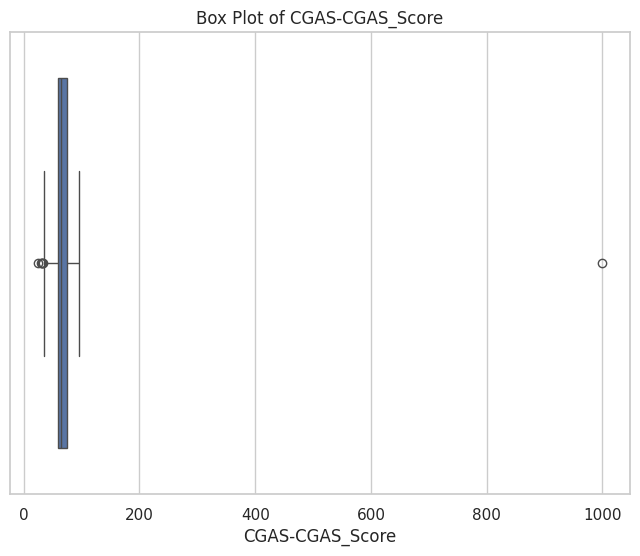

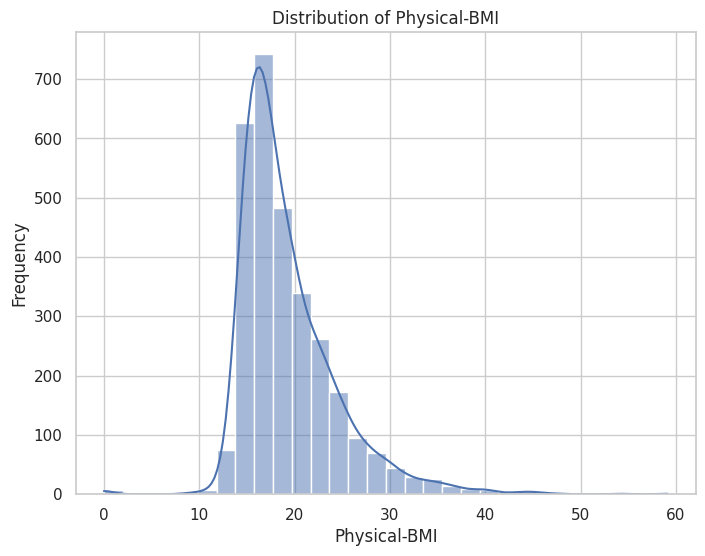

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


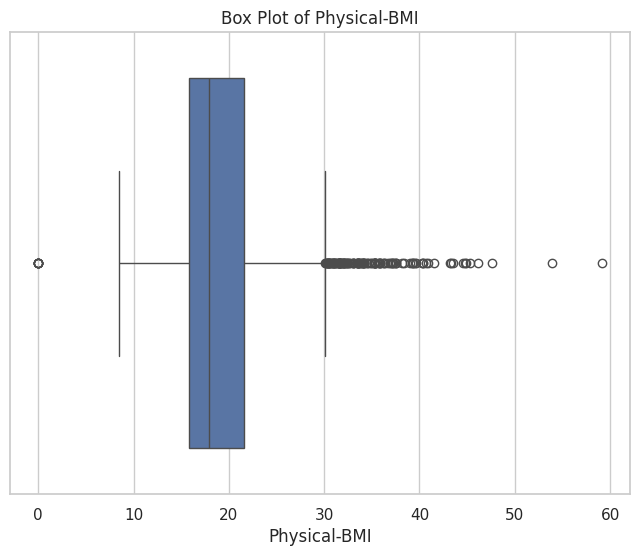

In [ ]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of categorical features
categorical_features = [
    "Basic_Demos-Enroll_Season",
    "CGAS-Season",
    "Physical-Season"
]

# List of numerical features
numerical_features = [
    "Basic_Demos-Age",
    "Basic_Demos-Sex",
    "CGAS-CGAS_Score",
    "Physical-BMI"
]

# Plotting categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plotting numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    # Histogram
    sns.histplot(df_train[feature], bins=30, kde=True)  # Add kde=True for a kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
df_train.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Sec,FGC-FGC_CU,...,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,2954.000000,2967.000000,2954.000000,743.000000,740.000000,2322.000000,...,2734.000000,2731.000000,2729.000000,2732.000000,2728.000000,2730.000000,2733.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,69.648951,81.597236,116.983074,4.989233,27.581081,11.259690,...,1.685443,0.244599,1.340051,1.035505,1.613636,1.158974,0.943652,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,13.611226,13.665196,17.061225,2.014072,17.707751,11.807781,...,1.543074,0.522956,1.411156,1.301712,1.529178,1.343661,1.185460,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,61.000000,72.000000,107.000000,4.000000,12.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,68.000000,81.000000,114.000000,5.000000,28.000000,9.000000,...,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,76.000000,90.500000,125.000000,6.000000,43.000000,15.750000,...,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,179.000000,138.000000,203.000000,28.000000,59.000000,115.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,3.000000,3.000000


In [ ]:
PCIAT_cols = [val for val in train.columns[train.columns.str.contains('PCIAT')]]
print('Number of PCIAT features = ' , len(PCIAT_cols))